In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('/resumedata/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
category = df['Category'].value_counts().reset_index()
category

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


In [114]:
df['cleaned'] = df['cleaned'].apply(lambda x:x.lower())

In [97]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stems(text):
    T = []
    
    for i in text.split():
        T.append(ps.stem(i))
    
    return " ".join(T)

In [115]:
label = LabelEncoder()
df['new_Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,6


(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

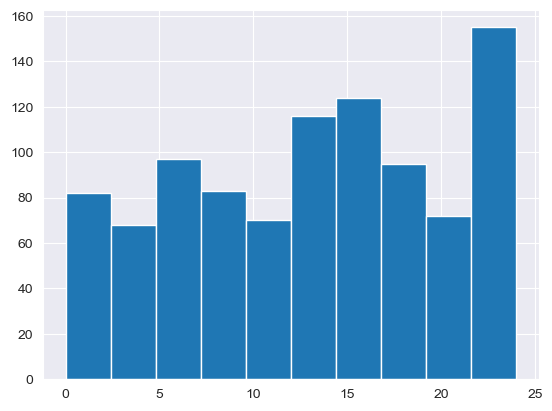

In [84]:
plt.hist(df['new_Category'])

In [116]:
text = df['cleaned']
target = df['new_Category']
word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
WordFeatures = word_vectorizer.fit_transform(text)

In [101]:
WordFeatures.shape

(962, 1500)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [118]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [119]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [120]:
y_pred = model.predict(X_test)

In [121]:
print(f'---------------------------------\n| Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(model.score(X_test, y_test)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 98.96% |
---------------------------------
| Validation Accuracy :- 96.89% |
---------------------------------


In [122]:
import pickle
pickle.dump(word_vectorizer,open('C:/Users/PC/Desktop/resumedata/tfidf.pkl','wb'))
pickle.dump(model, open('C:/Users/PC/Desktop/resumedata/model.pkl', 'wb'))

In [128]:
with open('C:/Users/PC/Desktop/cv5.txt', 'r') as fichier:
    resume_text=fichier.read()
    cleaned_resume = cleanResume(resume_text)
    input_features = word_vectorizer.transform([cleaned_resume])
    prediction_id = model.predict(input_features)[0]

In [129]:
print(prediction_id)

9


In [134]:
import PyPDF2

In [135]:
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                text += page.extract_text()
    except Exception as e:
        print(f"Error: {e}")
    return text

In [140]:
resume_text=extract_text_from_pdf('cv.pdf')
cleaned_resume = cleanResume(resume_text)
input_features = word_vectorizer.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]

In [141]:
print(prediction_id)

6
